<a href="https://colab.research.google.com/github/Pankaj-2003/LLMS-GPT/blob/main/makemore_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [46]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [47]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [48]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    # print(X)
    Y.append(ix)
    # print(Y)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [25]:
X.shape , Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

#### Making embeddings for our 27 chars (27,2) , the paper had 27k words which they embedded in a space of 30D , but we will do 2D.
#### And our input to neural net will be indexes.
#### The weight matrix can be C , and input will be index.

In [49]:
# embeddings for each alphabet
C = torch.randn((27,2))

In [50]:
print(C)

tensor([[-0.6546, -0.6623],
        [-0.8218, -0.9374],
        [-0.9857,  0.0672],
        [ 0.8969, -1.7080],
        [-1.2247,  0.8780],
        [-0.1351,  0.6735],
        [-1.1763, -2.1783],
        [-0.1671,  1.7628],
        [ 1.0927,  0.9508],
        [-0.5977,  0.4029],
        [-1.1369, -1.4328],
        [-1.1823, -0.1083],
        [-0.4112, -1.6842],
        [ 1.7892, -1.2619],
        [ 0.2555,  0.3745],
        [-1.3013, -1.2142],
        [-0.0620, -1.2481],
        [ 0.0106, -0.1656],
        [ 1.1681,  1.2427],
        [-0.6299, -1.0148],
        [-0.6786,  1.0963],
        [-0.4820, -0.9885],
        [ 0.1765, -1.0693],
        [-1.3640,  0.5346],
        [ 0.6260,  0.1635],
        [ 1.1007,  1.4053],
        [ 0.4523,  0.2307]])


In [8]:
# indexing
# C[torch.tensor([5,6,7])]
emb_x = C[X]
emb_x.shape

torch.Size([32, 3, 2])

In [51]:
# hidden layer
w1 = torch.rand((6,100))
b1 = torch.rand(100)

In [ ]:
h = torch.tanh(emb_x.view(-1,6) @ w1 + b1)

In [ ]:
h.shape

torch.Size([228146, 100])

In [52]:
w2 = torch.rand((100,27))
b2 = torch.rand(27)

In [ ]:
logits = h @ w2 + b2

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdim=True)

In [ ]:
prob.shape

torch.Size([228146, 27])

In [ ]:
loss = -prob[torch.arange(32) , Y].log().mean()

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [ ]:
loss

tensor(4.8841)

In [ ]:
# cross entp
F.cross_entropy(logits, Y).mean()

tensor(4.8841)

In [43]:
lre = torch.linspace(-3 , 0 , 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [53]:

# training neural net
lri = []
lossi = []
# forward pass
for p in [w1,b1,w2,b2]:
  p.requires_grad = True

for k in range(1000):
  # minibatch
  ix = torch.randint(0, X.shape[0], (32,))
  X_b = X[ix]
  Y_b = Y[ix]
  # forward pass
  emb_x = C[X_b]  # (32, 3 , 2)
  h = torch.tanh(emb_x.view(-1,6) @ w1 + b1)   # (32,100)

  logits = h @ w2 + b2   # (32,27)
  loss = F.cross_entropy(logits, Y_b)
  print(loss.item())

  # backward pass
  for p in [w1,b1,w2,b2]:
    p.grad = None

  loss.backward()
  lr = lrs[k]
  # update
  for p in [w1,b1,w2,b2]:
    p.data += -lr * p.grad
  # track
  lri.append(lr)
  lossi.append(loss.item())

# print(loss.item())

5.799192905426025
5.324154376983643
4.792079448699951
5.21455717086792
5.415374755859375
5.31146240234375
5.05231237411499
4.650574207305908
4.934137344360352
4.805238246917725
5.118992328643799
5.382692337036133
5.247861385345459
5.728208541870117
5.124942302703857
5.380124568939209
4.882079124450684
5.20626974105835
4.997722148895264
4.782636642456055
4.283836364746094
4.96522331237793
5.1126017570495605
4.6904706954956055
4.784339904785156
5.109322547912598
5.275545120239258
4.5381035804748535
4.840048789978027
5.700459957122803
4.660547733306885
5.213662147521973
5.482063293457031
4.445065021514893
4.85059118270874
5.229125022888184
4.344766139984131
4.850702285766602
4.568192958831787
4.7940192222595215
5.020866870880127
5.277187824249268
4.693105697631836
4.306257724761963
5.21669864654541
4.67836332321167
4.463736534118652
5.454254627227783
4.893596649169922
5.404820442199707
5.051395416259766
5.085808753967285
5.299839973449707
4.395471572875977
5.412961959838867
5.116650581359

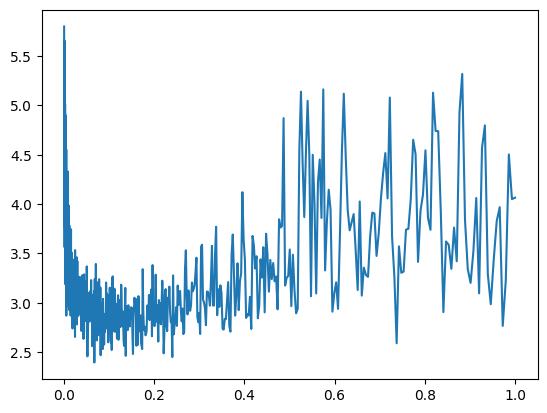

In [54]:
plt.plot(lri , lossi)

tensor([[ 0.5892, -0.4237],
        [-1.1747, -0.6410],
        [ 0.3504, -0.3683],
        [ 0.7248, -0.5618],
        [ 1.9453,  0.1276],
        [-0.4687, -0.1078],
        [-0.2492, -0.6649],
        [ 0.5896,  0.7018],
        [-1.8318, -0.4315],
        [ 0.4731,  0.2563],
        [-1.5749,  0.9479],
        [-0.8453, -1.6370],
        [ 0.5257, -0.9101],
        [ 1.2240,  1.2322],
        [ 1.2615,  0.0254],
        [ 0.1847, -0.6419],
        [-1.1622, -0.7981],
        [ 0.3459,  0.8566],
        [ 0.1862, -0.4290],
        [ 1.7868, -0.7045],
        [ 1.3005, -1.5072],
        [ 0.5768,  1.8151],
        [-0.3893,  2.3289],
        [-0.2508, -0.5470],
        [ 1.6863,  0.1978],
        [ 0.3144,  0.4314],
        [ 1.0001,  0.0244]])

In [30]:
ix = torch.randint(0 , X.shape[0] , (32,))

In [32]:
ix

tensor([ 63559, 147927,  49668,  85963, 140060,   6032,  15600, 155048, 211327,
        170093,  45832, 183132, 121902, 225869, 172742,  75480,  88950, 181568,
          8183, 142819,  51401,   5101, 180168,  95709,   8978,  27622, 166912,
        131552, 143496,  61987, 129940, 104227])

In [41]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [42]:
C


tensor([[ 0.5892, -0.4237],
        [-1.1747, -0.6410],
        [ 0.3504, -0.3683],
        [ 0.7248, -0.5618],
        [ 1.9453,  0.1276],
        [-0.4687, -0.1078],
        [-0.2492, -0.6649],
        [ 0.5896,  0.7018],
        [-1.8318, -0.4315],
        [ 0.4731,  0.2563],
        [-1.5749,  0.9479],
        [-0.8453, -1.6370],
        [ 0.5257, -0.9101],
        [ 1.2240,  1.2322],
        [ 1.2615,  0.0254],
        [ 0.1847, -0.6419],
        [-1.1622, -0.7981],
        [ 0.3459,  0.8566],
        [ 0.1862, -0.4290],
        [ 1.7868, -0.7045],
        [ 1.3005, -1.5072],
        [ 0.5768,  1.8151],
        [-0.3893,  2.3289],
        [-0.2508, -0.5470],
        [ 1.6863,  0.1978],
        [ 0.3144,  0.4314],
        [ 1.0001,  0.0244]])